In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('Tree_Inventory.csv')
df_dtypes = df.dtypes
# scaler = StandardScaler()

# scaler.fit(df)

# df_scaled = scaler.transform(df)



/var/folders/rz/kzx767sj7xg8w2bx7q8ksm1w0000gn/T/ipykernel_26827/871131866.py:16: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Tree_Inventory.csv')


In [40]:
df=df[~df['Common Name'].str.contains('VACANT')]
df=df[~df['Editing'].str.contains('Olmsted')]
df=df.drop(columns=['Side','Council District','Latitude','Site','DBH','Stormwater Benefits ($)','Longitude','Location','Park Name','Leaf Surface Area (in sq. ft.)','Stormwater Gallons Saved','Site ID','Side'])
# column = df['Editing']
# unique_elements = column.unique()
# res = {'Buffalo':1}
le=LabelEncoder()
df['Editing']=le.fit_transform(df['Editing'])
df['Botanical Name']=le.fit_transform(df['Botanical Name'])
df['Common Name']=le.fit_transform(df['Common Name'])
df['Street']=le.fit_transform(df['Street'])
df


Total Yearly Eco Benefits ($), Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.), CO2 Sequestered (in lbs.),Energy Benefits ($), kWh Saved, Therms Saved, Air Quality Benefits ($), Pollutants Saved (in lbs.), Property Benefits ($), Address, Street

,Editing,Botanical Name,Common Name,Total Yearly Eco Benefits ($),Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,Air Quality Benefits ($),Pollutants Saved (in lbs.),Property Benefits ($),Address,Street
11,0,24,178,185.02,1.81,345.13,249.85,93.54,140.03,52.50,14.87,2.37,52.84,540,820
12,0,15,172,92.73,0.81,147.16,138.67,41.51,59.71,23.54,5.87,0.97,38.69,28,578
15,0,250,147,110.52,1.02,224.83,137.60,55.61,91.22,30.42,7.98,1.35,37.14,102,1099
16,0,15,172,172.47,0.19,24.80,34.41,79.63,117.87,44.83,1.99,0.28,84.56,527,890
18,0,246,11,13.67,0.01,1.12,1.08,4.15,5.34,2.41,0.12,0.02,9.20,1124,942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130053,0,263,80,269.16,2.13,418.57,382.31,108.55,169.83,60.20,17.15,2.75,117.75,759,1041
130055,0,250,147,116.88,1.01,242.40,137.87,62.69,98.35,34.74,9.14,1.52,33.55,422,722
130056,0,255,143,188.86,0.15,29.10,22.65,90.16,138.30,50.27,2.29,0.32,87.06,341,1345
130058,0,106,120,51.39,0.01,1.32,0.96,5.15,6.25,3.03,0.10,0.01,45.89,293,788


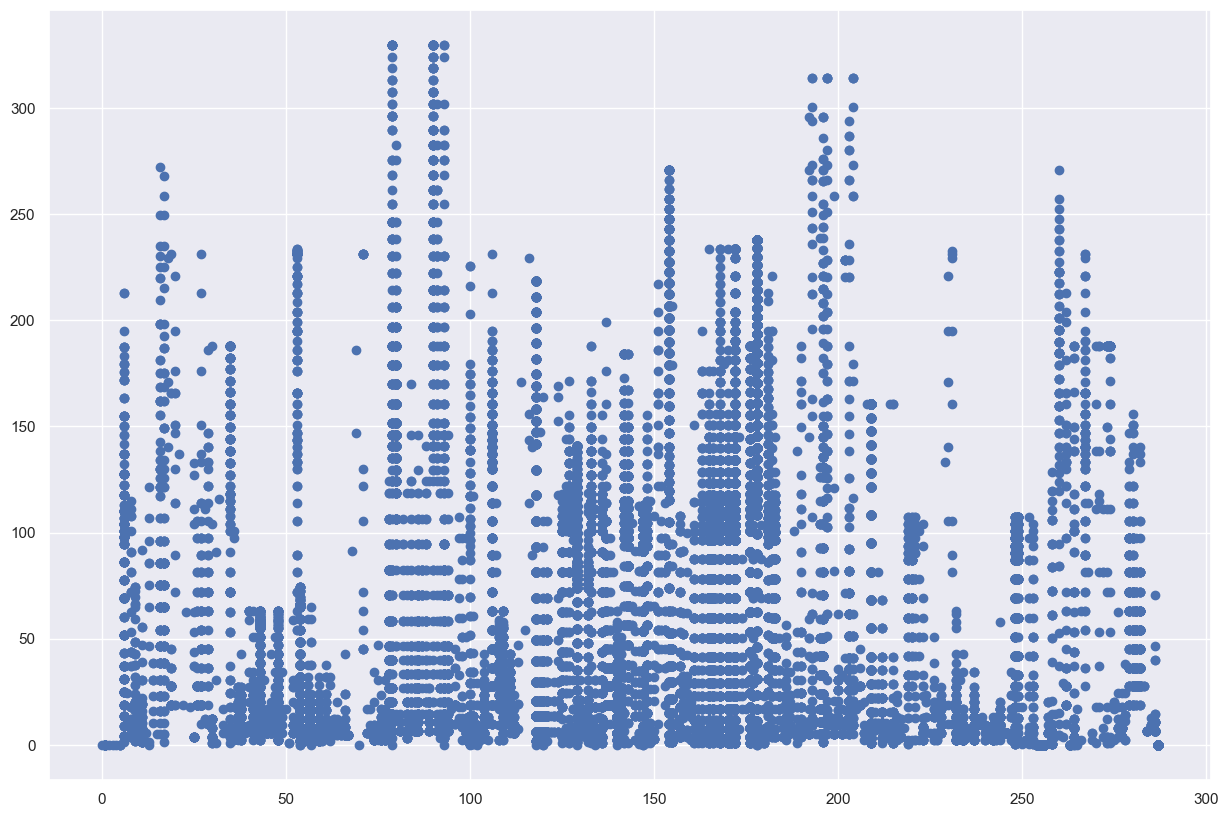

In [41]:
x=df['Common Name']
y=df['kWh Saved']
plt.scatter(x, y)
plt.show()
#As the data is not linearly separable hence we use scatter plot here and 
#we can't proceed with linear algorithms and thus classifiers such as SVM, Random Forest are used

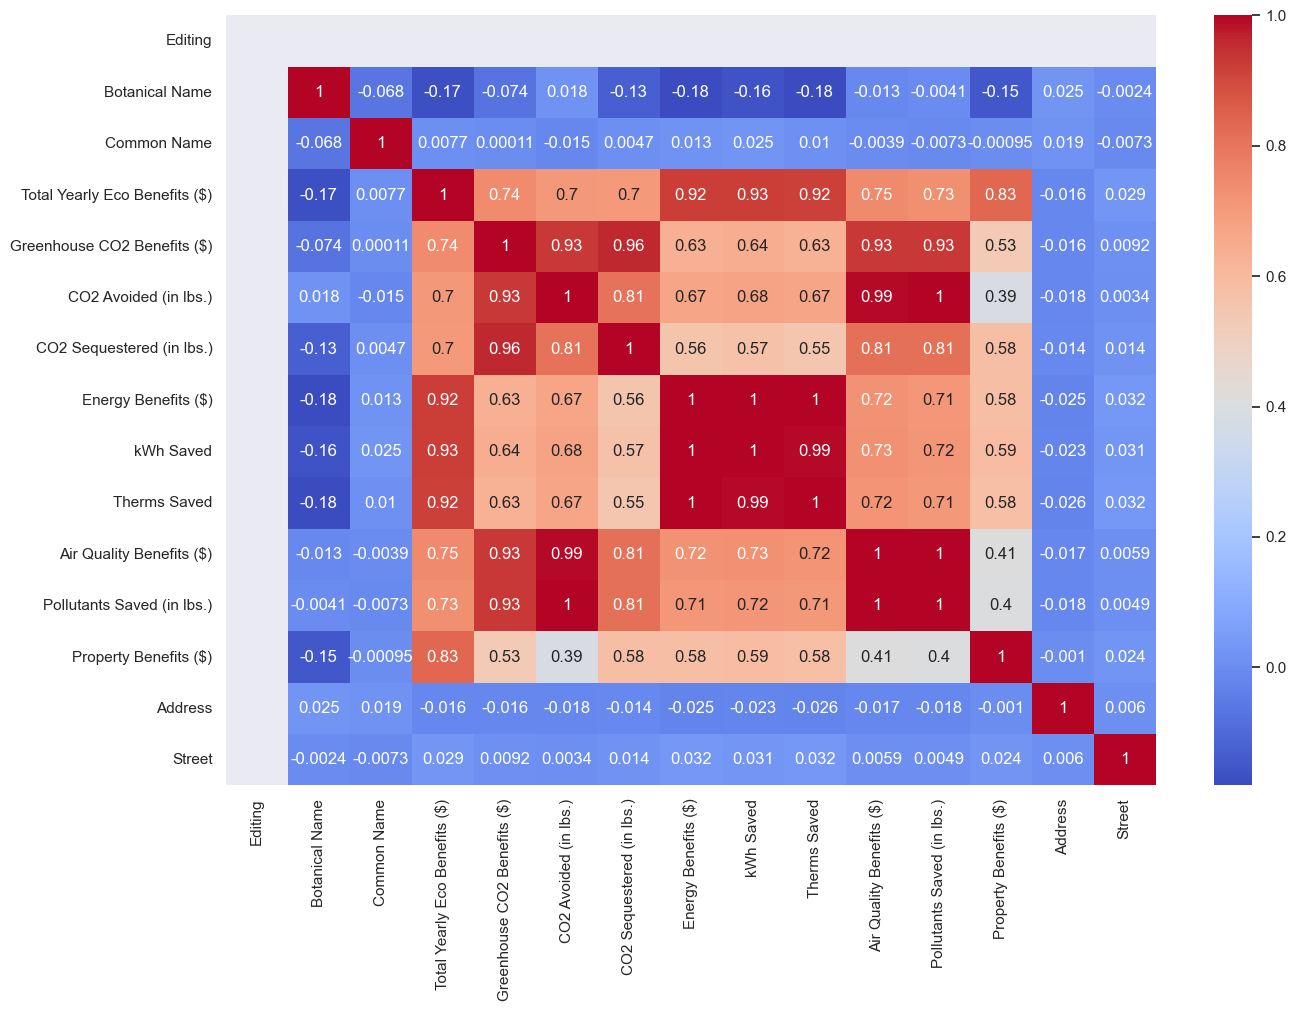

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


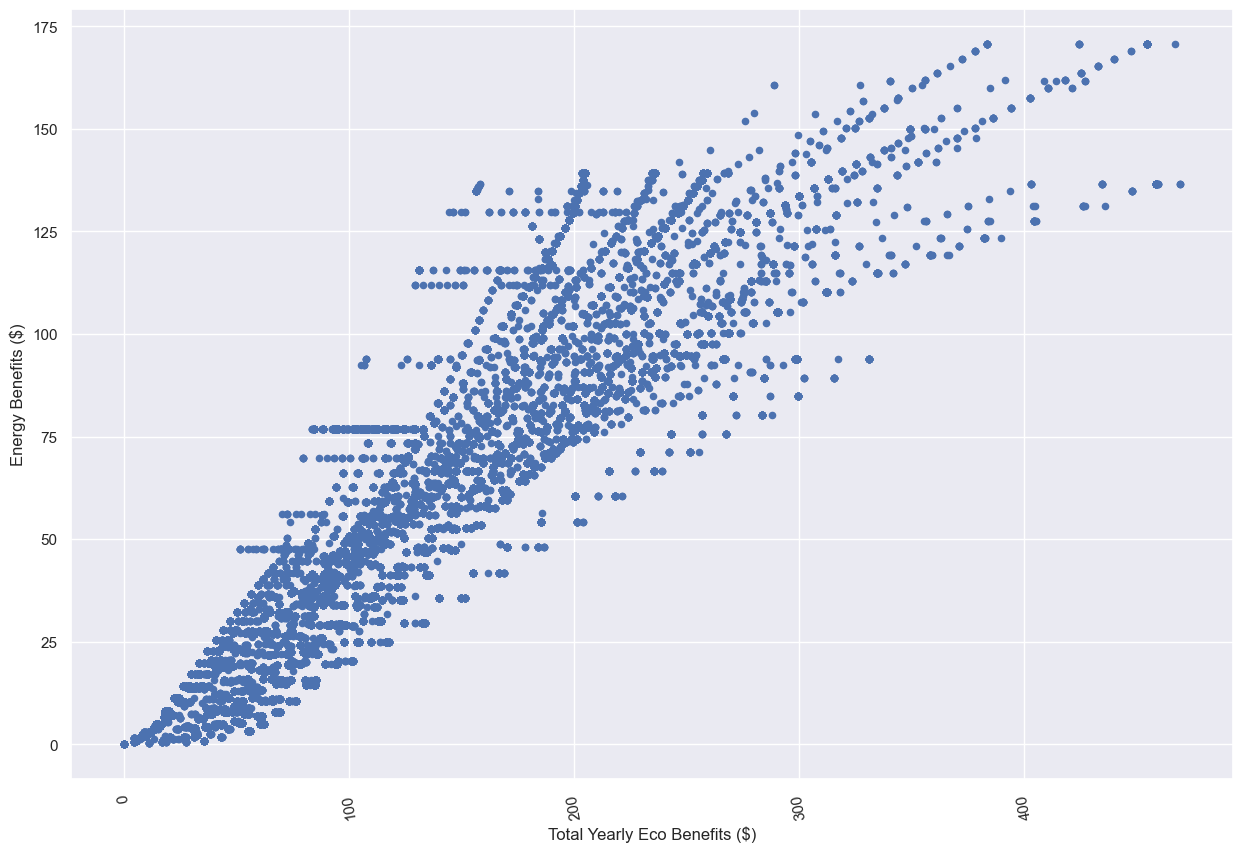

In [42]:
#We can also calculate the correlation matrix of the features and  #check if there are strong correlations between the features, 
#which may indicate linear dependence
corr = df.corr()
#The correlation matrix is then visualized using a heatmap generated by the Seaborn library. 
#The heatmap shows the correlations between all the features, with darker squares indicating a stronger correlation. 

# Heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
df.plot.scatter(x='Total Yearly Eco Benefits ($)', y='Energy Benefits ($)')
plt.xticks(rotation=100)
plt.show()


# # Line Plot
# df.plot(kind='line', x='kWh Saved', y='Total Yearly Eco Benefits ($)')
# plt.xticks(rotation=90)


# plt.show()


In [51]:
# #PCA
# features=df.drop(['Common Name'],axis=1).values
# pca=PCA(n_components=None)
# pca.fit(features)
# n=2
# X_pca=pca.transform(features)[:, :n]
# df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# plt.scatter(df_pca[:, 0], df_pca[:, 1])
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.show()


In [52]:
X=df.drop('Common Name',axis=1)
y=df['Common Name']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
rforest=RandomForestClassifier()
rforest.fit(X_train, y_train)
accuracy=rforest.score(X_test, y_test)
print('Accuracy:', (accuracy*100))

Accuracy: 95.13735137351374


In [ ]:
#Accuracy using SVC
X=df.drop('Common Name',axis=1)
y=df['Common Name']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
sv_res=SVC()
sv_res.fit(X_train,y_train)
y_pred=sv_res.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy:", acc)